In [1]:
# This notebook downloads and stores the OpenStreetMap NetworkX GraphML
# representation of the road network of Manhattan.

In [22]:
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx
import shapely
from shapely.geometry import MultiPolygon

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
CRS_NYC = 'EPSG:2263'
CRS_LATLON = 'EPSG:4326'
DATA_DIR = '../data'

In [3]:
nyc_mg = ox.graph_from_place('New York City, New York, USA')

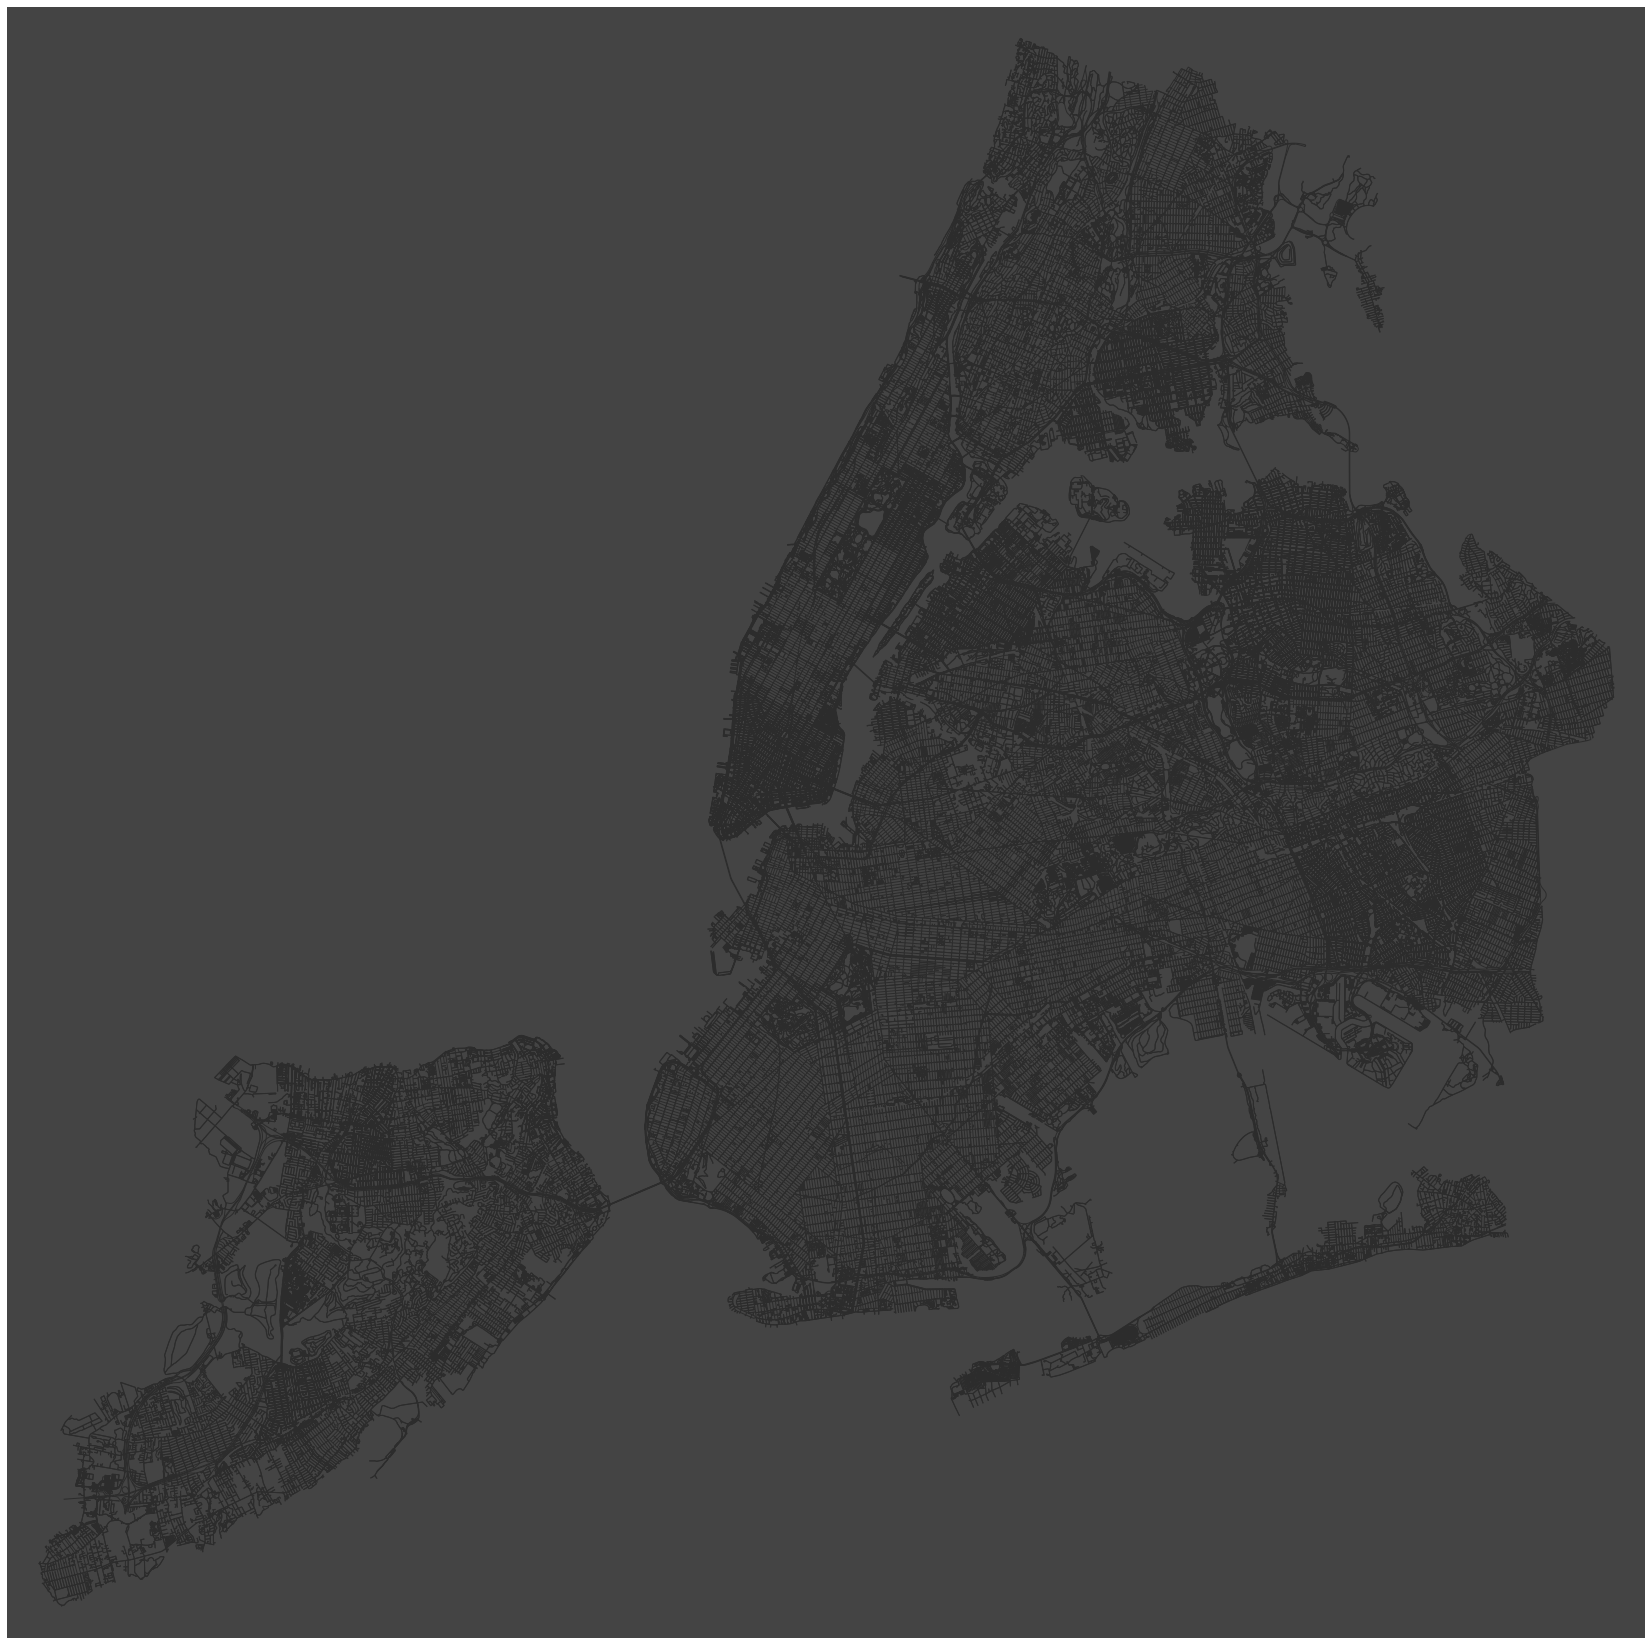

In [4]:
fig, ax = plt.subplots(figsize=(30, 30))
ox.plot_graph(nyc_mg,
              ax=ax,
              bgcolor='#444',
              node_size=0,
              show=False,
              close=False,
              edge_color='#2c2c2c')
ax.set_facecolor('#444')

In [12]:
ox.save_graphml(nyc_mg, f'{DATA_DIR}/graphml/nyc.graphml')

<AxesSubplot:>

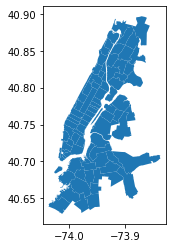

In [30]:
nyc_cb_gdf = gpd.read_file(f'{DATA_DIR}/geo/nyc_citibike.geojson', crs=CRS_NYC)
nyc_cb_gdf = nyc_cb_gdf.to_crs(CRS_LATLON)
nyc_cb_gdf.plot()

In [34]:
geoms = list(nyc_cb_gdf['geometry'])
geom = MultiPolygon(shapely.ops.unary_union(geoms))

In [35]:
geom.bounds

(-74.03693204798819, 40.62902344165668, -73.83696277938968, 40.89663990413099)

In [39]:
nyc_bbox_mg = ox.truncate.truncate_graph_bbox(nyc_mg, geom.bounds[1], geom.bounds[3], geom.bounds[2], geom.bounds[0])

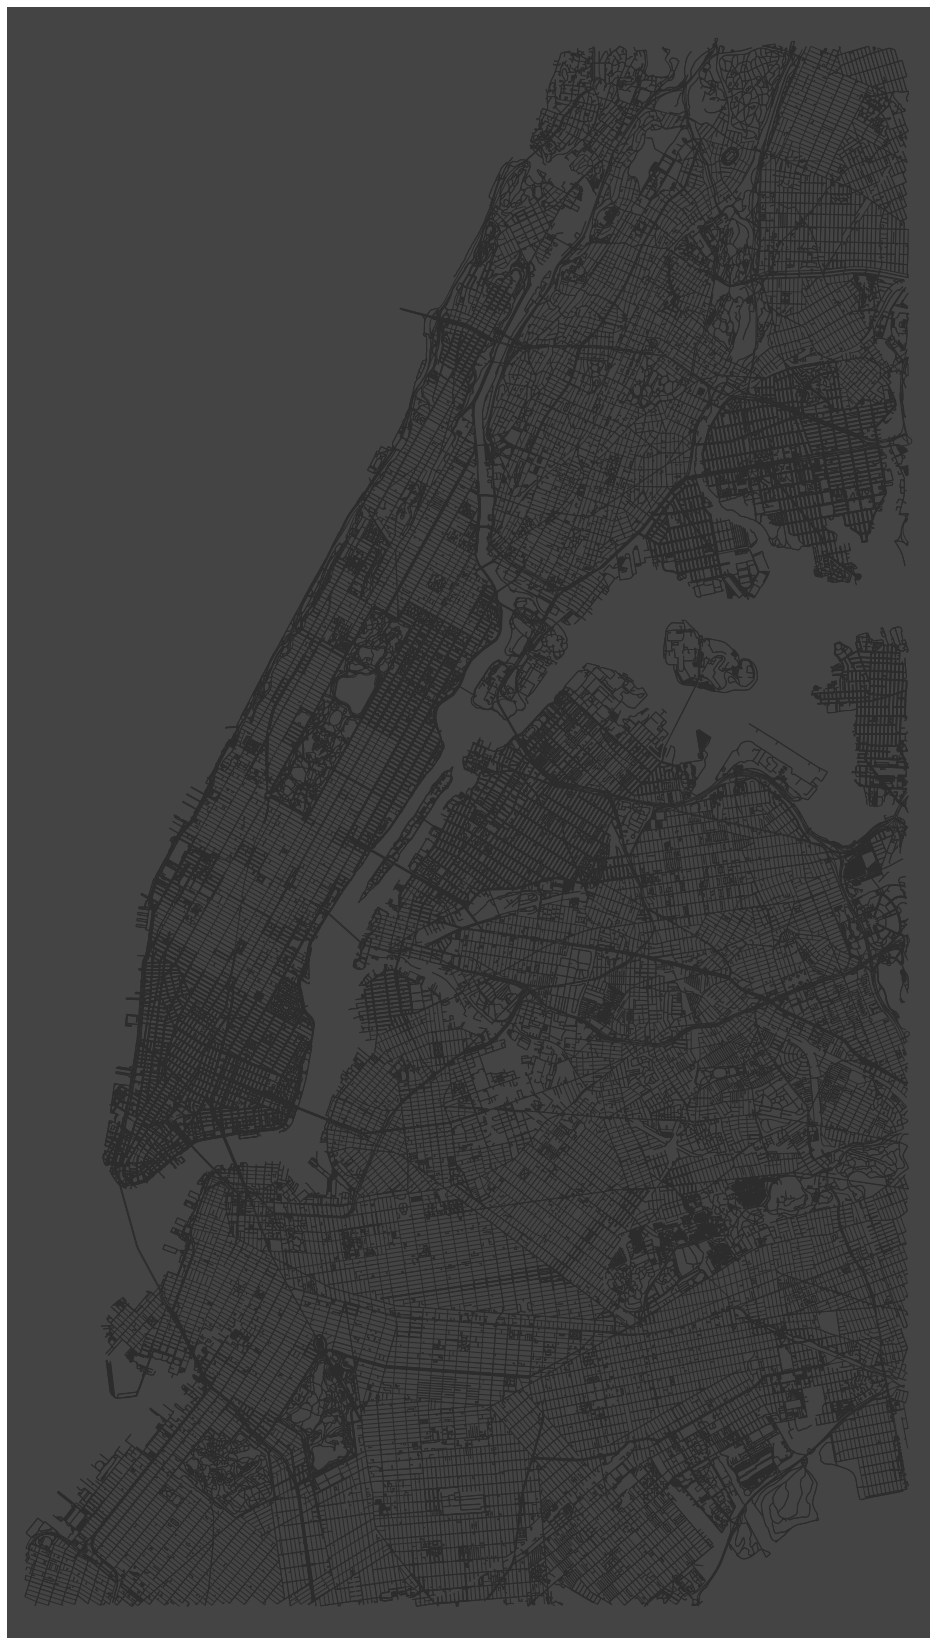

In [40]:
fig, ax = plt.subplots(figsize=(30, 30))
ox.plot_graph(nyc_bbox_mg,
              ax=ax,
              bgcolor='#444',
              node_size=0,
              show=False,
              close=False,
              edge_color='#2c2c2c')
ax.set_facecolor('#444')

In [41]:
ox.save_graphml(nyc_bbox_mg, f'{DATA_DIR}/graphml/nyc_cb_bbox.graphml')